# Detecting borders among an image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Task 1 : detecting borders

In [2]:
prewitt_v_mask = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
prewitt_h_mask = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
sobel_v_mask = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
sobel_h_mask = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

**1.1** Apply these masks to the squares from project 1, then display vertical borders and horizontal borders separately

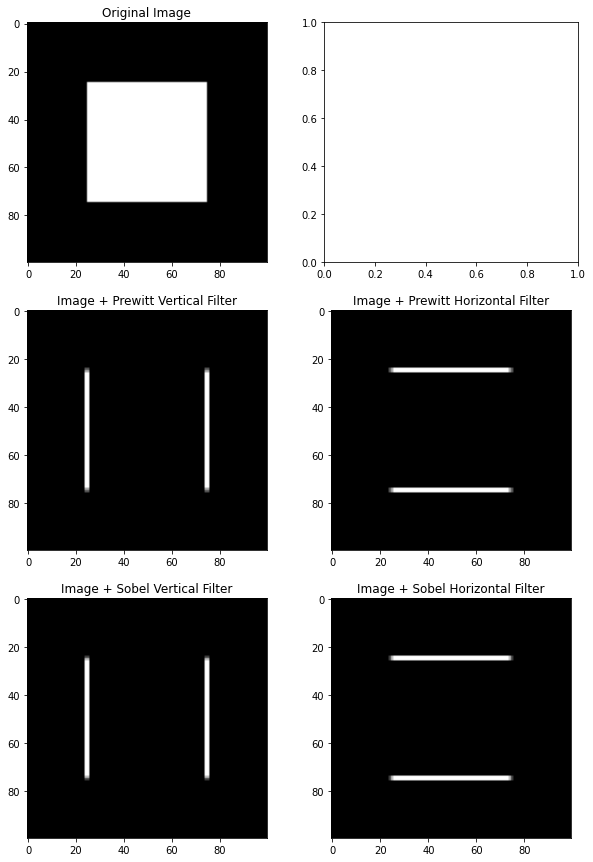

In [3]:
bw_img = np.zeros((100, 100))
bw_img[25:75, 25:75] = np.ones((50, 50))

prewitt_v_img = np.absolute(cv2.filter2D(bw_img, -1, prewitt_v_mask))
prewitt_h_img = np.absolute(cv2.filter2D(bw_img, -1, prewitt_h_mask))
sobel_v_img = np.absolute(cv2.filter2D(bw_img, -1, sobel_v_mask))
sobel_h_img = np.absolute(cv2.filter2D(bw_img, -1, sobel_h_mask))

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

axs[0][0].set_title("Original Image")
axs[0][0].imshow(bw_img, cmap=plt.cm.gray)
axs[1][0].set_title("Image + Prewitt Vertical Filter")
axs[1][0].imshow(prewitt_v_img, cmap=plt.cm.gray)
axs[1][1].set_title("Image + Prewitt Horizontal Filter")
axs[1][1].imshow(prewitt_h_img, cmap=plt.cm.gray)
axs[2][0].set_title("Image + Sobel Vertical Filter")
axs[2][0].imshow(sobel_v_img, cmap=plt.cm.gray)
axs[2][1].set_title("Image + Sobel Horizontal Filter")
axs[2][1].imshow(sobel_h_img, cmap=plt.cm.gray)

plt.show()

**1.2** Apply these masks in a row and display the borders of the image based on a threshold to compare with the norm

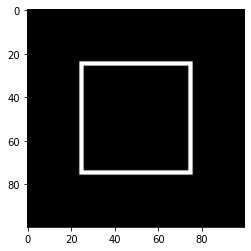

In [6]:
threshold = 0.1
concat_img = np.sqrt(prewitt_v_img**2 + prewitt_h_img**2)
# scales image from [0, max] to [0, 1]
concat_img = (concat_img - concat_img.min())/(concat_img.max() - concat_img.min())
concat_img[concat_img >= threshold] = 1
concat_img[concat_img < threshold] = 0
plt.imshow(concat_img, cmap=plt.cm.gray)
plt.show()

**Advanced questions**

**A.1** Test and observe results from Task 1.2 on an image such as 'lena.jpg' with different thresholds (a high one, an optimal one and a low one)

**A.2** Implement the hysteresis thresholding method (Not implemented)

In [7]:
def detects_edges(img, mask_v, mask_h, threshold):
    v_img = np.absolute(cv2.filter2D(img, -1, mask_v))
    v_img = (v_img - v_img.min())/(v_img.max() - v_img.min())
    v_img[v_img >= threshold] = 1
    v_img[v_img < threshold] = 0

    h_img = np.absolute(cv2.filter2D(img, -1, mask_h))
    h_img = (h_img - h_img.min())/(h_img.max() - h_img.min())
    h_img[h_img >= threshold] = 1
    h_img[h_img < threshold] = 0

    output_img = np.sqrt(h_img**2 + v_img**2)
    output_img = output_img.astype(np.float64)

    return output_img

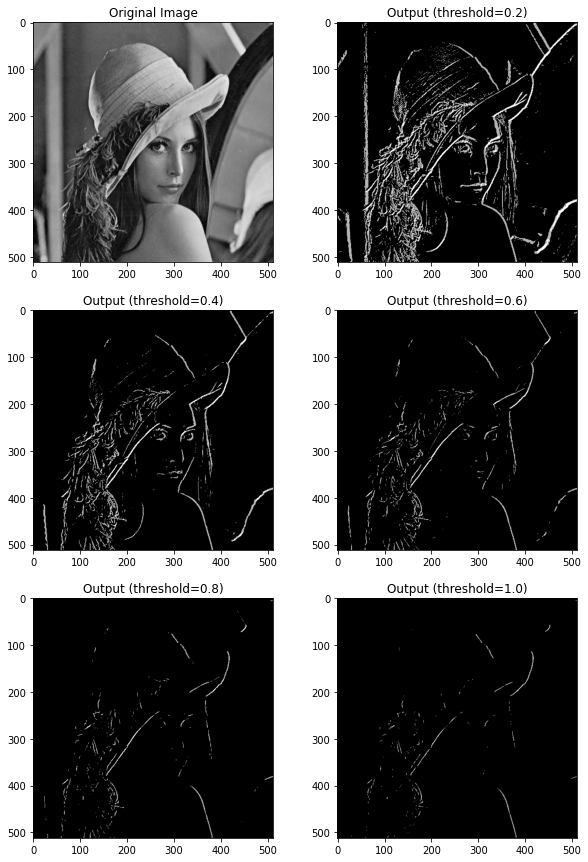

In [8]:
# Image
img = cv2.imread("./data/lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detecting borders, threshold is between 0 and 1 because of BGR3GRAY
output_1 = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 0.2)
output_2 = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 0.4)
output_3 = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 0.6)
output_4 = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 0.8)
output_5 = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 1.0)

# Display
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

axs[0][0].set_title("Original Image")
axs[0][0].imshow(img, cmap=plt.cm.gray)
axs[0][1].set_title("Output (threshold=0.2)")
axs[0][1].imshow(output_1, cmap=plt.cm.gray)
axs[1][0].set_title("Output (threshold=0.4)")
axs[1][0].imshow(output_2, cmap=plt.cm.gray)
axs[1][1].set_title("Output (threshold=0.6)")
axs[1][1].imshow(output_3, cmap=plt.cm.gray)
axs[2][0].set_title("Output (threshold=0.8)")
axs[2][0].imshow(output_4, cmap=plt.cm.gray)
axs[2][1].set_title("Output (threshold=1.0)")
axs[2][1].imshow(output_5, cmap=plt.cm.gray)

plt.show()

### Task 2

**2.1** Read the file 'lena.jpg'

In [9]:
original_img = cv2.imread("./data/lena.jpg")
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

**2.2** Apply these 3 following masks to the image :

In [15]:
h1 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

h2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

h3 = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

h1_img = cv2.filter2D(img, -1, h1)
h2_img = cv2.filter2D(img, -1, h2)
h3_img = cv2.filter2D(img, -1, h3)

**2.3** Display the original image and the resulting images

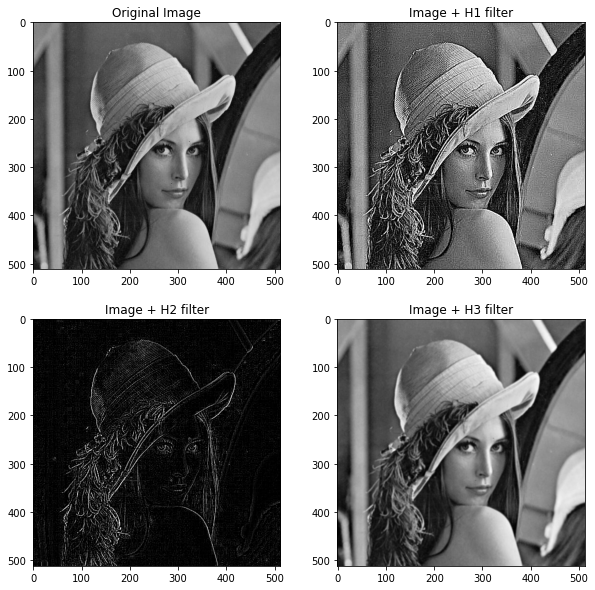

In [16]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

axs[0][0].set_title("Original Image")
axs[0][0].imshow(original_img)
axs[0][1].set_title("Image + H1 filter")
axs[0][1].imshow(h1_img, cmap=plt.cm.gray)
axs[1][0].set_title("Image + H2 filter")
axs[1][0].imshow(h2_img, cmap=plt.cm.gray)
axs[1][1].set_title("Image + H3 filter")
axs[1][1].imshow(h3_img, cmap=plt.cm.gray)

plt.show()

**2.4** What do you observe ? Explain the results

*H1 Filter* : each pixel is prioritize compared to its neighbors, so the resulting image is therefore more detailed.

*H2 Filter* : focuses on the pixels with a clear difference with their neighbors (in a homogeneous space, neighbors cancel the importance of the considered pixel)

*H3 Filter* : only slightly impacts the image, since it is a mean filter.